In [105]:
from astropy.io import fits
import math
import numpy as np
import matplotlib.pyplot as plt



#img_array = np.array(img_list)

# Save the array as fits - it will save it as an image cube
#fits.writeto('testcube.fits', img_array)


#cube = np.zeros((50,1000,1000)) #Here 1000x1000 is the dimension of the individual fits images and 50 is the third perpendicular axis(time/freq)

axes1 = []
axes2 = []
dates = []
for i in range(1, 41, 1):
    hdu = fits.open('pallas' + str(i) + '.fits')
    hdr = hdu[0].header
    axis1 = hdr['NAXIS1']
    axis2 = hdr['NAXIS2']
    date = hdr['DATE_OBS']
    dates.append(date)
    axes1.append(axis1)
    axes2.append(axis2)


for k in range(len(axes1)):
    print(str(axes1[k]) + ',' + str(axes2[k]))
          
#hdu_new = fits.PrimaryHDU(cube)
#hdu_new.writeto('cube.fits')


cube = np.zeros((3, 182, 184))
#8, 9, 13
hdu_arr = []
hdu1 = fits.open('pallas8.fits')
hdu2 = fits.open('pallas9.fits')
hdu3 = fits.open('pallas13.fits')

data1 = hdu1[0].data[:, :]
data2 = hdu2[0].data[:, :]
data3 = hdu2[0].data[:, :]
hdu_arr.append(data1)
hdu_arr.append(data2)
hdu_arr.append(data3)

for i in range(0, 3): 
    data = hdu_arr[i]
    cube[i, :, :] = data
    
print(data.shape(cube))

sorted_dates = [len(dates)]
sorted_dates_idx = []

sorted_dates[0] = sorted(dates)
for d in range(len(dates)): 
    sorted_dates_idx.append(dates[d])
    
print(sorted_dates)

#reproject the image onto 183 x 183
#im1,im2 = FITS_tools.match_fits(to_be_projected,reference_fits)


143,183
182,184
183,183
92,183
182,183
182,122
182,112
183,174
182,184
182,184
182,164
183,184
182,183
182,184
182,184
126,184
129,99
183,183
183,183
182,184
167,184
182,184
183,183
182,183
123,183
183,140
182,144
183,183
183,184
182,184
182,184
183,183
182,183
182,183
182,108
182,177
182,182
182,104
182,184
140,184


ValueError: could not broadcast input array from shape (174,183) into shape (182,184)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[[        nan 19.17387556 24.6062953  ... 19.15811183 17.27643732
  15.44329888]
 [        nan 21.02743994 22.60380755 ... 21.51089987 17.19019548
  13.61239347]
 [        nan 19.89498003 19.19975398 ... 18.27456368 14.21430302
  14.67861452]
 ...
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]]


/Users/ad27/opt/anaconda3/lib/python3.9/site-packages/astropy/wcs/wcsapi/fitswcs.py:331: UserWarning: 'WCS.all_world2pix' failed to converge to the requested accuracy.
After 2 iterations, the solution is diverging at least for one input point.
  warnings.warn(str(e))
/Users/ad27/opt/anaconda3/lib/python3.9/site-packages/astropy/wcs/wcs.py:1752: RuntimeWarning: All-NaN slice encountered
  while (np.nanmax(dn) >= tol2 and k < maxiter):


done


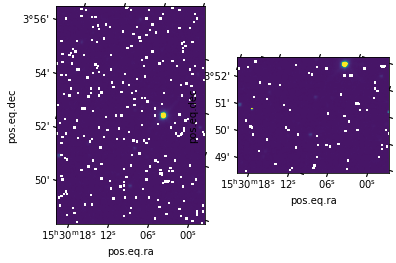

In [143]:
#using reproject package
from astropy.wcs import WCS
from reproject import reproject_interp

hdu16 = fits.open('pallas16.fits')[0]
ax1 = plt.subplot(1,2,1, projection=WCS(hdu16.header))
ax1.imshow(hdu16.data, origin='lower', vmin=-100., vmax=2000.)

hdu17 = fits.open('pallas17.fits')[0]
ax2 = plt.subplot(1,2,2, projection=WCS(hdu17.header))
ax2.imshow(hdu17.data, origin='lower', vmin=-100., vmax=2000.)

array, footprint = reproject_interp(hdu17, hdu16.header)

#ax3 = plt.subplot(1, 2, 1, projection=WCS(hdu17.header))
#ax3.imshow(array, origin='lower', vmin=-100., vmax=2000.)

print(array)

reprojected = []

for i in range(1, 41, 1): 
    hdu = fits.open('pallas' + str(i) + '.fits')[0]
    hdu_rpj = fits.open('pallas18.fits')[0]
    array, footprint = reproject_interp(hdu, hdu_rpj.header)
    reprojected.append(array)

print('done')



In [148]:
reprojected = np.array(reprojected)

print(np.shape(reprojected))

(40, 183, 183)


In [149]:
hdu_modcube = fits.PrimaryHDU(reprojected)
hdu_modcube.writeto('reprojected-pallas.fits')

print('done!!')

done!!


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


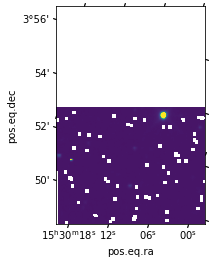

In [95]:
ax3 = plt.subplot(1, 2, 1, projection=WCS(hdu16.header))
ax3.imshow(array, origin='lower', vmin=-100., vmax = 2000.)
ax3.set_title = ('reprojected image, hopefully')

In [44]:
print(axes1[8], axes1[9])
print(axes2[8], axes2[9])

182 182
184 184


In [53]:
cube2 = np.zeros((2, 174, 183))

hdu8 = fits.open('pallas8.fits')
data8 = hdu8[0].data

hdu9 = fits.open('pallas8.fits')
data9 = hdu9[0].data

print(data8.shape)
print(data9.shape)

cube2[0, :, :] = data8
cube2[1, :, :] = data9

print(cube2.shape)

hdu_cube2 = fits.PrimaryHDU(cube2)
hdu_cube2.writeto('cube2.fits', overwrite=True)

print('done')


(174, 183)
(174, 183)
(2, 174, 183)
done


In [65]:
print(data9)

[[20.42073  16.783634  9.712919 ... 16.114944 23.747753 18.005016]
 [12.341696 15.544415 21.18853  ... 18.174797 19.621876 18.174797]
 [21.86631  18.174797 21.527378 ... 18.147232 19.233532 16.358852]
 ...
 [15.621218 15.310487 20.484726 ... 25.065971 21.186726 19.884636]
 [21.514378 18.75792  17.636095 ... 19.980774 18.361156 17.813564]
 [19.240356 20.905167 16.940517 ... 16.090092 22.112583 16.593742]]


In [73]:
hdr9 = hdu9[0].header
print(repr(hdr9))

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  183 / length of data axis 1                          
NAXIS2  =                  174 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'WISE    '                                                            
BUNIT   = 'DN      '                                                            
EQUINOX =                 2000                                                  
RADECSYS= 'FK5     '                                                            
FILETYPE= 'intensity image f

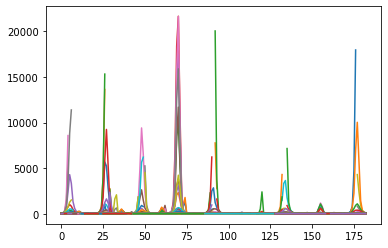

In [151]:
in_arr = []
for i in range(40): 
    arr = reprojected[i, :, :]
    plt.plot(np.arange(0, 183, 1), arr)
    

(183,) (183,) (40,)


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (40,)  and requested shape (183,)

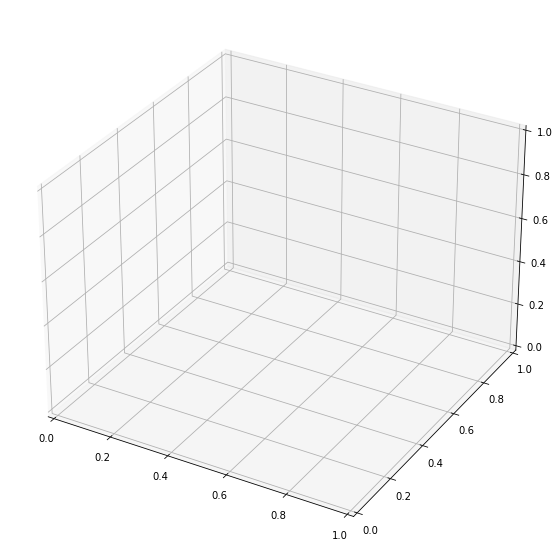

In [162]:
#3d plot of x, y, and intensity spectra
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

#reprojected; 40, 183, 183 = x, y, z
xdata = reprojected[1, :, 1]
ydata = reprojected[1, 1, :]
zdata = reprojected[:, 1, 1]
print(xdata.shape, ydata.shape, zdata.shape)
ax.plot3D(xdata, ydata, zdata, 'gray')

print('ok')
